# 2.5. Problem Statement: Machine Learning 5

In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.
Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import
train_test_split from
sklearn.preprocessing import
StandardScaler from sklearn import
datasets boston = datasets.load_boston()
features = pd.DataFrame(boston.data,
columns=boston.feature_names)
targets = boston.target

# Solution

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)
targets = boston.target

In [31]:
features.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [32]:
targets[:5] #MEDV column in dataset

array([24. , 21.6, 34.7, 33.4, 36.2])

In [33]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
features.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

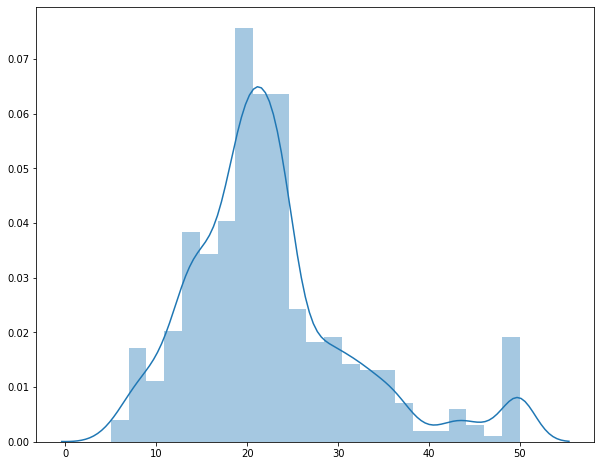

In [35]:
target_df=pd.DataFrame(targets)
target_df.describe()
import seaborn as sns
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(target_df)

It can be observed that the price value almost follows a normal distribution with few variations(outliers)
Now we try to get the relationship between the variables by calculating correlation matrix,

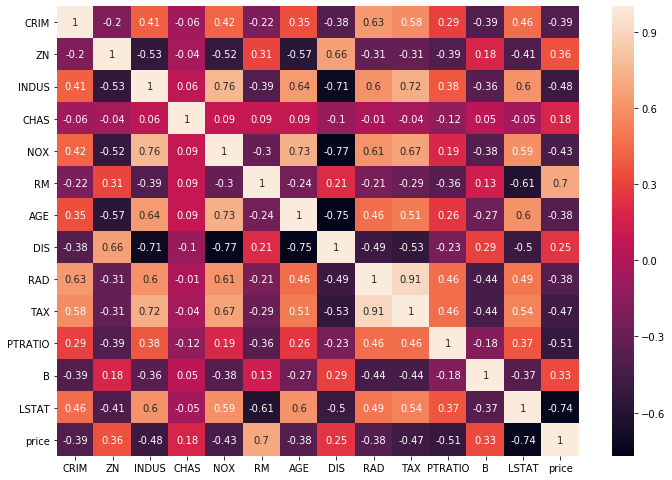

In [36]:
features['price']=targets
corr_matrix=features.corr().round(2)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=corr_matrix,annot=True)

Checking the correlation value of various features against price (last column), it can be observed that RM has a strong positive correlation with it (0.7) while LSTAT has a strong negative correlation(-0.74). So both these features significantly affects the price value. So both of these features can be used for training and fitting the model.
It should also be noted that certain features have strong cross correlation , like RAD and TAX value being 0.91, and DIS and NOS , with a value of -0.77. These should never be considered together because we cannot distinguish the effect of NOS on price and DIS on price. However they are not being considered as features here since their respective correlation values with price is low.

Now we create new data with the selected features(RM and LSAT) for model fitting

In [21]:
X = features[['LSTAT','RM']]
print(X.head())
y = features['price']
print("\nPrice Data:")
print(y.head())

   LSTAT     RM
0   4.98  6.575
1   9.14  6.421
2   4.03  7.185
3   2.94  6.998
4   5.33  7.147

Price Data:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64


# Training and Evaluating the model

In [37]:
# Splitting data to training and testing set and normalizing the data to avoid skewness due to variance
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [38]:
# Model fitting
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [47]:
# Model Prediction and Evaluation
from sklearn import metrics
y_pred_train = rf.predict(X_train_scaled)

print("Original output for Training set:")
print(y_train[0:5])
print("Predicted output for Training set:")
print(y_pred_train[:5])
print()

y_pred_test = rf.predict(X_test_scaled)
print("Original output for Testing set:")
print(y_test[0:5])
print("Predicted output for Testing set:")
print(y_pred_test[:5])
print()

# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Training data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error:",metrics.mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print()
#Evaluating for testing set
# calculate MAE, MSE, RMSE for training set
print("Testing the performance of the model for Testing data:")
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Original output for Training set:
477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: price, dtype: float64
Predicted output for Training set:
[12.73  21.448 18.36  12.964 18.528]

Original output for Testing set:
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: price, dtype: float64
Predicted output for Testing set:
[21.908 34.852 19.582 24.156 15.81 ]

Testing the performance of the model for Training data:
Mean Absolute Error: 1.2390643564356445
Mean Squared Error: 3.669734722772279
Root Mean Squared Error: 1.9156551680227523

Testing the performance of the model for Testing data:
Mean Absolute Error: 3.1433529411764685
Mean Squared Error: 21.982306627450967
Root Mean Squared Error: 4.688529260594517
